# Chemspace Explorer Initialization

In [4]:
import sys
import os

# Get path to the inner ms_chemical_space_explorer directory
CHEMSPACE_EXPLORER_FOLDER = os.path.abspath(os.path.join(os.getcwd(), '../ms_chemical_space_explorer/ms_chemical_space_explorer'))
DATA_FOLDER = "data"
PROCESSED_DATA_FOLDER = "processed"
FILENAME = os.path.join(CHEMSPACE_EXPLORER_FOLDER, "..", DATA_FOLDER, PROCESSED_DATA_FOLDER, "1000_test_spectra.mgf")
PICKLE = "pickle"

print(f"Adding to path: {CHEMSPACE_EXPLORER_FOLDER}")  # Debug print
sys.path.append(CHEMSPACE_EXPLORER_FOLDER)

Adding to path: g:\Dokumente\Studium\MMI\Master-Arbeit\Code\ms_chemical_space_explorer\ms_chemical_space_explorer


In [9]:
import pickle
from chemical_space_explorer import start_workflow, run_analogue_search

def analogue_search(n: int = 2):
    file = os.path.join(PICKLE, f'results_n={n}.pkl')
    try:
        with open(file, 'rb') as f:
            analogues = pickle.load(f)
            print(f"Loaded analogues from {file}")
    
    except FileNotFoundError:
        explorer = start_workflow(os.path.abspath(os.path.join(CHEMSPACE_EXPLORER_FOLDER, "..", DATA_FOLDER, PROCESSED_DATA_FOLDER)))
        analogues = run_analogue_search(explorer, FILENAME, n)
        
        with open(file, 'wb') as f:
            pickle.dump(analogues, f)
        print(f"Analogues saved to {file}")
        
    return analogues

# Code

In [13]:
analogues = analogue_search(n=3)

Loaded analogues from pickle\results_n=3.pkl


query_spectrum_id: 0, n: 2, threshold: 0.2, fragments_per_row: 5, debug: False, include_visited_pairs: False
<class 'pandas.core.frame.DataFrame'>


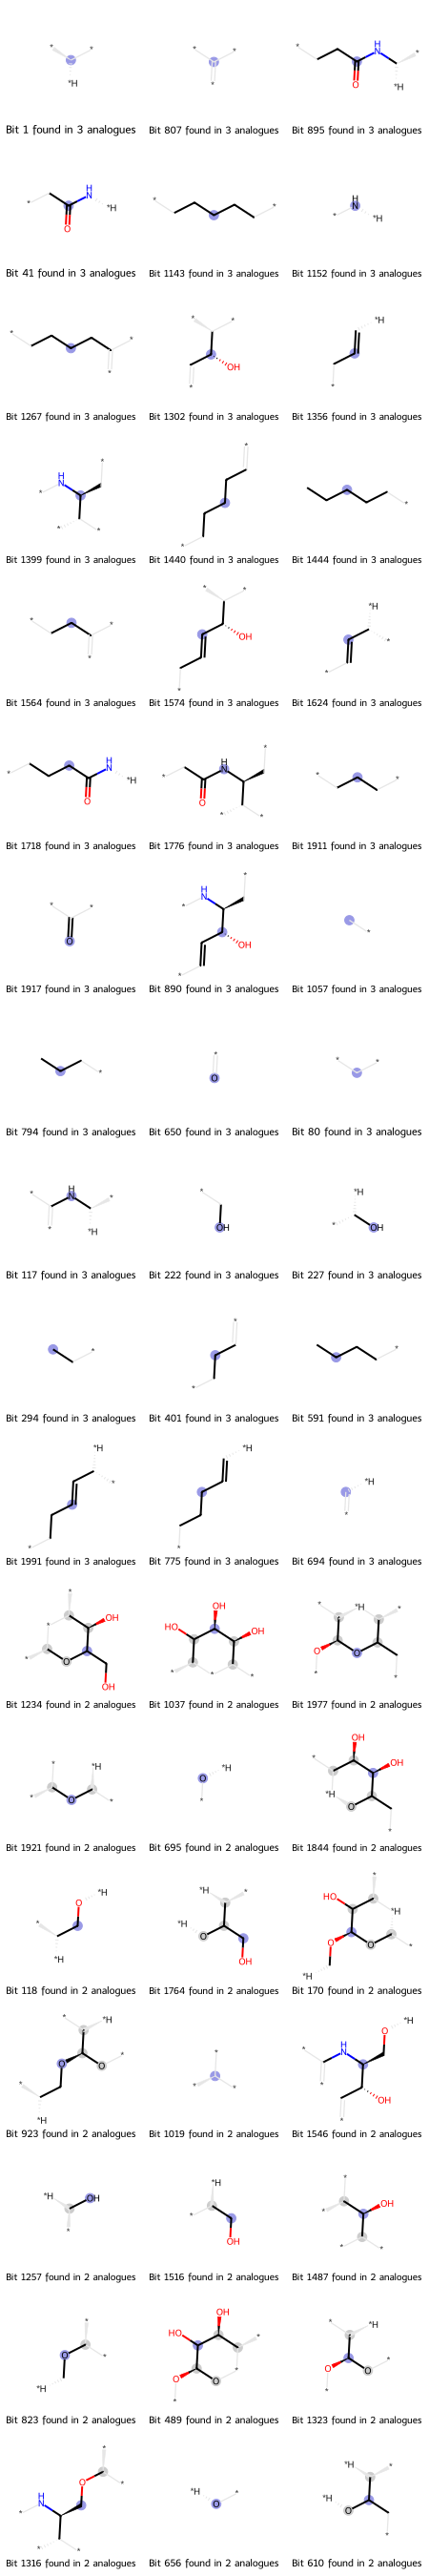

In [ ]:
from fragment_extractor import generate_mols_from_spectrum_query, extract_bitvector_fragments_from_analogues

threshold = 0.2
query_spectrum_id = 0
fragments_per_row = 5
debug = False
include_visited_pairs = False

print(
    f"query_spectrum_id: {query_spectrum_id}, n: {2}, threshold: {threshold}, fragments_per_row: {fragments_per_row}, debug: {debug}, include_visited_pairs: {include_visited_pairs}"
)

# Pick analogues for a specific spectrum
analogues_to_visualize = analogues[analogues["query_spectrum_id"] == query_spectrum_id]

# generate rdkit mols and preapre them for visualization
mols = generate_mols_from_spectrum_query(spectrum_query_result=analogues_to_visualize)

extract_bitvector_fragments_from_analogues(mols)